# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
periodcharger = pd.read_csv("data1.csv")

X_df = periodcharger.iloc[:, :100]

# y contains the last column (target)
y_df = periodcharger['Class']

df = pd.concat([X_df, y_df], axis=1)

print(df.head())
print(df.info())


   MATS3v  nHBint10  MATS3s  MATS3p  nHBDon_Lipinski  minHBint8  MATS3e  \
0  0.0908         0  0.0075  0.0173                0        0.0 -0.0436   
1  0.0213         0  0.1144 -0.0410                0        0.0  0.1231   
2  0.0018         0 -0.0156 -0.0765                2        0.0 -0.1138   
3 -0.0251         0 -0.0064 -0.0894                3        0.0 -0.0747   
4 -0.0094         0  0.0132 -0.1035                0        0.0 -0.0046   

   MATS3c  minHBint2  MATS3m  ...    EE_Dzp    EE_Dzv      ATS8e   maxsOH  \
0  0.0409        0.0  0.1368  ...  232.9974  222.2215  1094.3304   0.0000   
1 -0.0316        0.0  0.1318  ...  316.5453  275.4714  1146.4297   0.0000   
2 -0.1791        0.0  0.0615  ...  329.4171  301.4346  1131.1074  11.2259   
3 -0.1151        0.0  0.0361  ...  324.6823  300.3548  1288.3298  11.2531   
4 -0.0870        0.0  0.1063  ...  316.4220  299.6573   994.9338   0.0000   

   minssssNp  maxsOm  MDEC-23  MDEC-22  MDEC-24      Class  
0        0.0     0.0  60.

Classification Report for Class:
              precision    recall  f1-score   support

     Changer       0.29      0.22      0.25         9
   NoChanger       0.65      0.72      0.68        18

    accuracy                           0.56        27
   macro avg       0.47      0.47      0.47        27
weighted avg       0.53      0.56      0.54        27





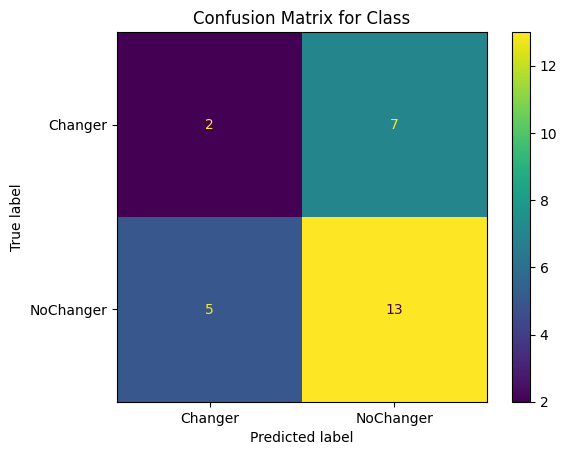

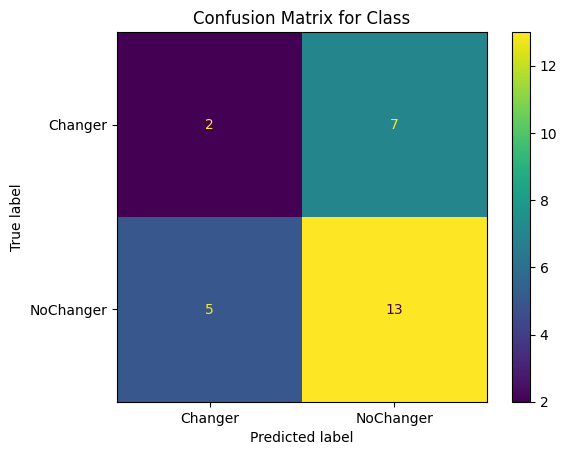

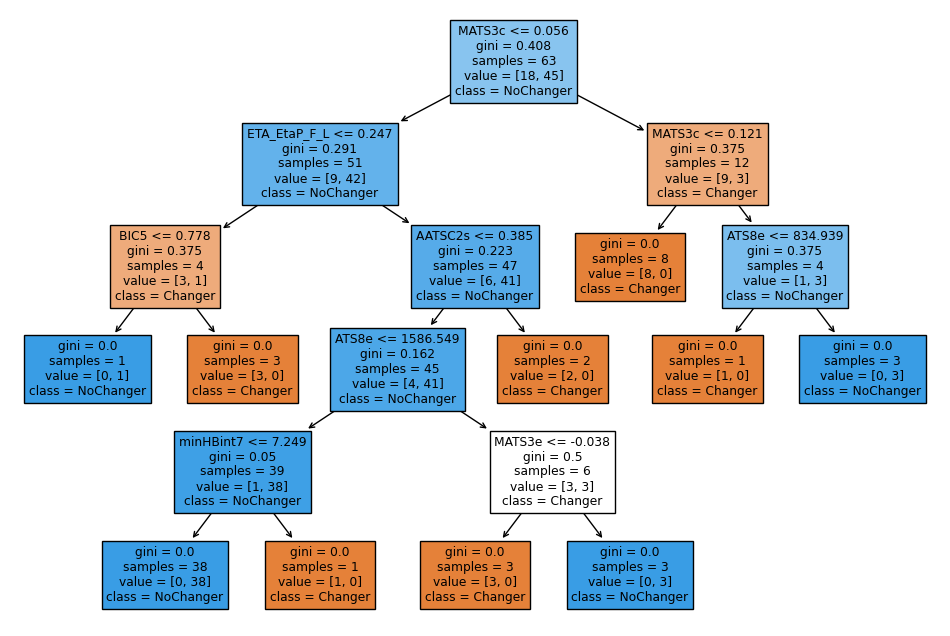

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df[['Class']], test_size=0.3, random_state=42)

# Step 2: Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Step 3: Build a Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train_encoded, y_train)

# Step 4: Evaluate the Model for each target variable
y_pred = model.predict(X_test_encoded)

# Adjust the shape of y_pred if necessary
if y_test.shape[1] == 1:
    y_pred = y_pred.reshape(-1, 1)

for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    print(f"Classification Report for {target_variable}:")
    print(classification_report(y_test[target_variable], y_pred[:, i]))
    print("\n")


# Compute and display the confusion matrix for each target variable
for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    unique_labels = sorted(y_test[target_variable].unique())  # Get unique labels
    cm = confusion_matrix(y_test[target_variable], y_pred[:, i], labels=unique_labels)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    cmd.plot()
    plt.title(f"Confusion Matrix for {target_variable}")
    plt.show()


# Display the confusion matrix for each target variable
for i in range(len(y_test.columns)):
    target_variable = y_test.columns[i]
    unique_labels = sorted(y_test[target_variable].unique())  # Get unique labels
    cm = confusion_matrix(y_test[target_variable], y_pred[:, i], labels=unique_labels)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    cmd.plot()
    plt.title(f"Confusion Matrix for {target_variable}")
    plt.show()

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=model.classes_)
plt.show()
